# San Silvestre 2021

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data, plot_hist, get_mine, plot_grid, TIEMPOS, RITMOS
import matplotlib as mpl

In [2]:
# mpl.use('Qt5Cairo');

In [3]:
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
%precision %.2f

'%.2f'

In [4]:
data = load_data()
data.head()

,Dorsal,Nombre,Categ.,Puesto,P.Cat.,Tiempo,Ritmo Km.,"Km. 2,5",Km. 5,"Km. 7,5","Tiempo Km. 2,5 (Minutos)",Tiempo Km. 5 (Minutos),"Tiempo Km. 7,5 (Minutos)",Tiempo Km. 10 (Minutos),Ritmo Km. (Minutos),"Ritmo Min/Km. 2,5",Ritmo Min/Km. 5,"Ritmo Min/Km. 7,5",Ritmo Min/Km. 10
0,36417,David Bascuñana Corrales,M-35,1,1,0:29:13,"2'55""/km",0:07:09,0:14:17,0:21:03,7.15,14.28,21.05,29.22,2.92,2.86,2.86,2.81,2.92
1,27702,Jaouad El Bissis El Bissis,M-35,2,2,0:29:18,"2'55""/km",0:07:09,0:14:17,0:21:09,7.15,14.28,21.15,29.30,2.92,2.86,2.86,2.82,2.93
2,29141,Luis Agustín Escriche,Sénior M,3,1,0:30:30,"3'03""/km",0:07:23,0:14:37,0:21:46,7.38,14.62,21.77,30.50,3.05,2.95,2.92,2.90,3.05
3,22312,Javier Martinez Fernández,M-35,4,3,0:30:48,"3'04""/km",0:07:24,0:14:54,0:22:07,7.40,14.90,22.12,30.80,3.07,2.96,2.98,2.95,3.08
4,10217,Sergio Salinero Miguel,M-35,5,4,0:30:59,"3'05""/km",0:07:25,0:14:54,0:22:10,7.42,14.90,22.17,30.98,3.08,2.97,2.98,2.96,3.10


In [5]:
mine = get_mine(data)
mine

,Dorsal,Nombre,Categ.,Puesto,P.Cat.,Tiempo,Ritmo Km.,"Km. 2,5",Km. 5,"Km. 7,5","Tiempo Km. 2,5 (Minutos)",Tiempo Km. 5 (Minutos),"Tiempo Km. 7,5 (Minutos)",Tiempo Km. 10 (Minutos),Ritmo Km. (Minutos),"Ritmo Min/Km. 2,5",Ritmo Min/Km. 5,"Ritmo Min/Km. 7,5",Ritmo Min/Km. 10
5745,31471,Maximiliano Greco,Sénior M,5746,1449,0:52:56,"5'17""/km",0:12:34,0:24:45,0:37:06,12.57,24.75,37.10,52.93,5.28,5.03,4.95,4.95,5.29


# Estadísticas

In [6]:
tiempo_all = data["Tiempo Km. 10 (Minutos)"]
tiempo_mine = mine["Tiempo Km. 10 (Minutos)"]

Cuánto tiempo tardé en completar la carrera?

In [7]:
f"{tiempo_mine.item():.2f} Minutos"

'52.93 Minutos'

De media, cuánto tardaron los corredores en completar la carrera ?

In [8]:
f"{tiempo_all.mean():.2f} Minutos"

'58.15 Minutos'

En qué percetil está mi tiempo ?

In [9]:
f"{stats.percentileofscore(tiempo_all, tiempo_mine.item()):.2f}%"

'35.03%'

Cuánto tardó el corredor mediano ?

In [10]:
f"{tiempo_all.median():.2f} Minutos"

'56.85 Minutos'

Cuánto tardó el corredor que tardó menos que el 80% ?

In [11]:
f"{tiempo_all.quantile(0.2):.2f} Minutos"

'48.75 Minutos'

## Ritmo


In [12]:
mine[RITMOS].iloc[0]

Ritmo Min/Km. 2,5   5.03
Ritmo Min/Km. 5     4.95
Ritmo Min/Km. 7,5   4.95
Ritmo Min/Km. 10    5.29
Name: 5745, dtype: float64

In [13]:
#
data[RITMOS].mean()

Ritmo Min/Km. 2,5   5.65
Ritmo Min/Km. 5     5.61
Ritmo Min/Km. 7,5   5.56
Ritmo Min/Km. 10    5.81
dtype: float64

In [14]:
#
data[RITMOS].std()

Ritmo Min/Km. 2,5   1.67
Ritmo Min/Km. 5     1.27
Ritmo Min/Km. 7,5   1.17
Ritmo Min/Km. 10    1.17
dtype: float64

# Plot

In [15]:
plt.ion()
kw = {'xlabel': 'Minutos / Kilómetro', 'ylabel': 'Porcentaje (%)'}

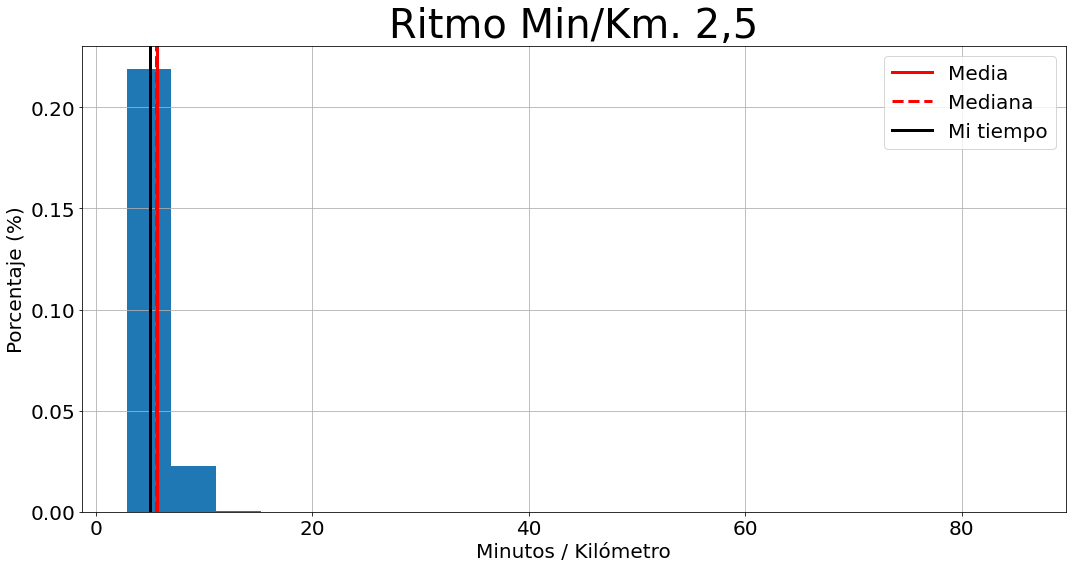

In [16]:
plot_hist(RITMOS[0], data, title=RITMOS[0], **kw)

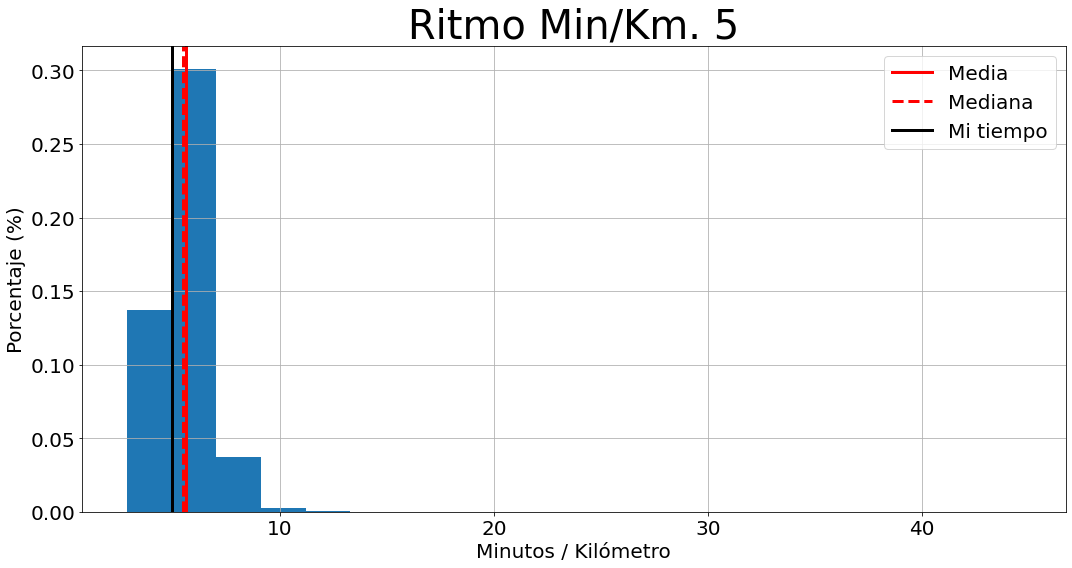

In [17]:
plot_hist(RITMOS[1], data, title=RITMOS[1], **kw)

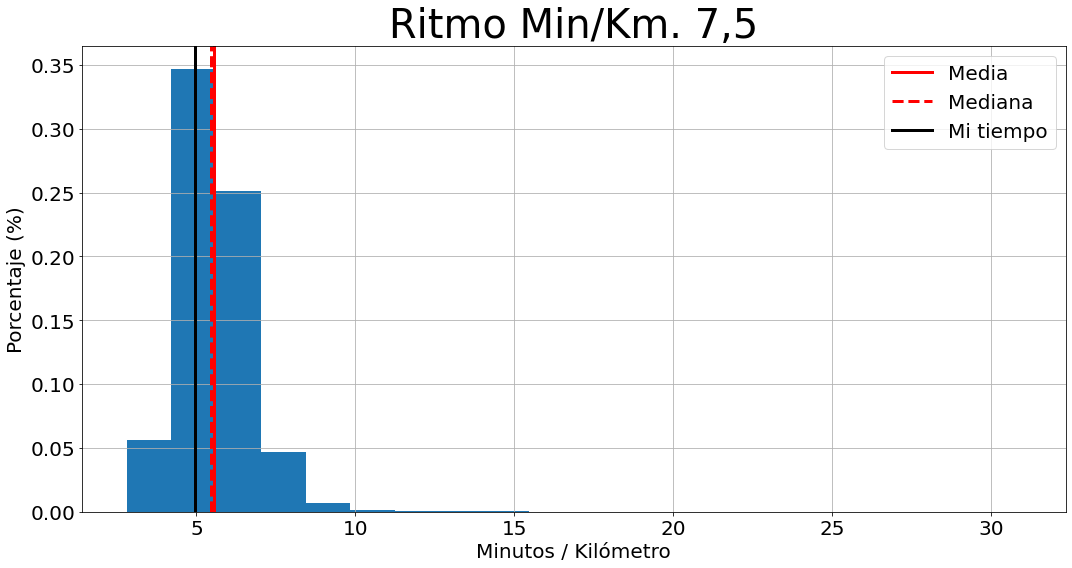

In [18]:
plot_hist(RITMOS[2], data, title=RITMOS[2], **kw)

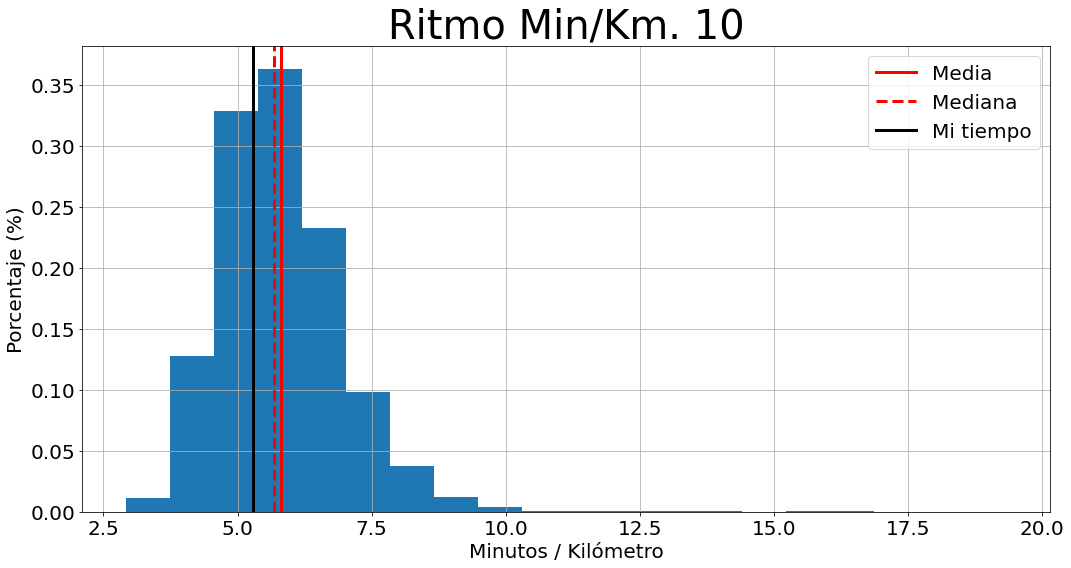

In [19]:
plot_hist(RITMOS[3], data, title=RITMOS[3], **kw)

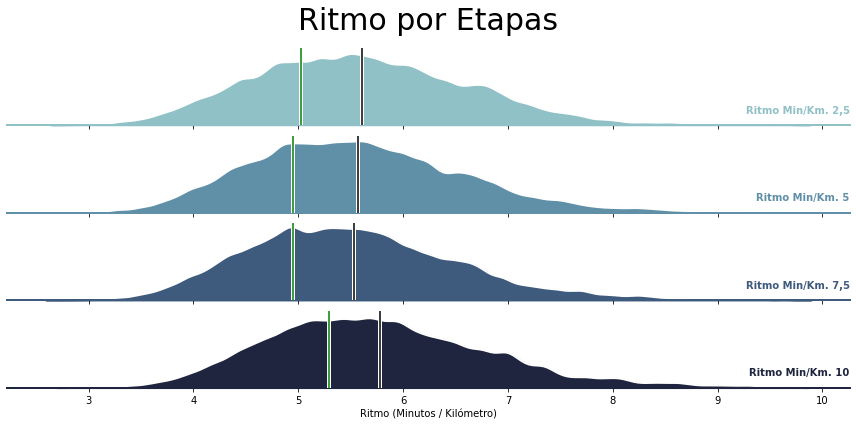

In [20]:
plot_grid(data)

In [21]:
mine[TIEMPOS].iloc[0]
categ_mine = mine["Categ."].item()
data.query(" `Categ.` == @categ_mine ")
data.groupby("Categ.").mean()[RITMOS].sort_values(RITMOS[-1])
data.groupby("Categ.").std()[RITMOS]

,"Ritmo Min/Km. 2,5",Ritmo Min/Km. 5,"Ritmo Min/Km. 7,5",Ritmo Min/Km. 10
Categ.,,,,
F-35,1.12,1.18,1.07,1.12
F-45,1.03,1.03,1.17,1.12
F-55,1.20,1.29,1.33,1.47
F-65,1.05,1.53,1.63,1.58
Júnior F,0.98,1.03,1.05,1.11
Júnior M,3.54,2.26,1.28,1.17
M-35,1.04,1.00,1.02,1.06
M-45,1.78,1.07,1.10,1.10
M-55,1.00,1.06,1.03,1.08


Andando

In [22]:
len(data[data["Ritmo Min/Km. 10"] > 13])

27